In [53]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
url = 'http://www.nfl.com/scores/2017/REG'
df = pd.DataFrame(columns=['team-name','team-score','first-qt','second-qt','third-qt','fourth-qt','ot'])
row = 0

for s in range(1,11):
    page = urlopen(url+str(s))
    soup = BeautifulSoup(page, 'html.parser')
    scores = soup.find_all('p',attrs={'class':'total-score'})
    teams = soup.find_all('p',attrs={'class':'team-name'})
    record = soup.find_all('p',attrs={'class':'team-record'})
    quarters = soup.find_all('p',attrs={'class':'quarters-score'})
    per_quarter = []

    for quarter in quarters:
        qt = []
        for x in quarter.children:
            qt.append(x.text)
        per_quarter.append(qt)
        
    for i in range(0,len(scores)):
        df.loc[row] = [teams[i].text, scores[i].text, per_quarter[i][0],per_quarter[i][1],per_quarter[i][2],per_quarter[i][3],per_quarter[i][4]]
        row+=1
        
df.to_csv('scores_1_to_11.csv', encoding='utf-8')

In [212]:
import numpy as np
df.head()

,team-name,team-score,first-qt,second-qt,third-qt,fourth-qt,ot
0,Chiefs,42,7,7,7,21,
1,Patriots,27,7,10,10,0,
2,Steelers,21,7,7,7,0,
3,Browns,18,7,0,3,8,
4,Cardinals,23,10,0,7,6,


In [84]:
'''
Get list of teams: 
Go through this for all teams:
http://www.nfl.com/teams/profile?team=KC
'''
url = "http://www.nfl.com/teams/profile?team=KC"
page = urlopen(url)
soup = BeautifulSoup(page, 'html.parser')
div_w_teams = soup.find_all('select', attrs={'class':'team-roster'})
for value in div_w_teams:
    print(value)

<select class="team-roster" id="team-roster" name="teamroster">
<option>Select a Team...</option>
<option value="ARI">Arizona Cardinals</option>
<option value="ATL">Atlanta Falcons</option>
<option value="BAL">Baltimore Ravens</option>
<option value="BUF">Buffalo Bills</option>
<option value="CAR">Carolina Panthers</option>
<option value="CHI">Chicago Bears</option>
<option value="CIN">Cincinnati Bengals</option>
<option value="CLE">Cleveland Browns</option>
<option value="DAL">Dallas Cowboys</option>
<option value="DEN">Denver Broncos</option>
<option value="DET">Detroit Lions</option>
<option value="GB">Green Bay Packers</option>
<option value="HOU">Houston Texans</option>
<option value="IND">Indianapolis Colts</option>
<option value="JAX">Jacksonville Jaguars</option>
<option value="KC">Kansas City Chiefs</option>
<option value="LAC">Los Angeles Chargers</option>
<option value="LA">Los Angeles Rams</option>
<option value="MIA">Miami Dolphins</option>
<option value="MIN">Minnesota Vi

In [99]:
teams = ["ARI","ATL","BAL","BUF","CAR","CHI","CIN","CLE","DAL","DEN","DET","GB","HOU","IND","JAX","KC","LAC","LA","MIA","MIN","NE","NO","NYG","NYJ","OAK","PHI","PIT","SF","SEA","TB","TEN","WAS"]
url = "http://www.nfl.com/teams/profile?team="
df2 = pd.DataFrame(columns=['team-name','points','yards','pass-yards','rush-yards'])
row = 0
#For Offense
for team in teams:
    test = []
    page = urlopen(url+team)
    soup = BeautifulSoup(page, 'html.parser')
    score = soup.find_all('div', attrs={'class':'team-quick-stat-body'})
    test.append(team)
    test.append(score[0].text.split("(")[0])
    test.append(score[1].text.split("(")[0])
    test.append(score[2].text.split("(")[0])
    test.append(score[3].text.split("(")[0])
    df2.loc[row] = test
    row+=1

df2

,team-name,points,yards,pass-yards,rush-yards
0,ARI,17.6,328.2,258.9,69.3
1,ATL,23.1,359.1,245.4,113.7
2,BAL,21.3,279.8,165.2,114.6
3,BUF,20.8,302.1,184.4,117.7
4,CAR,21.3,336.6,209.0,127.6
5,CHI,17.4,302.2,170.4,131.8
6,CIN,16.9,265.6,197.6,68.0
7,CLE,15.0,300.7,199.5,101.2
8,DAL,22.5,333.5,198.7,134.8
9,DEN,18.3,329.8,216.9,112.9


In [101]:
df2.to_csv('teams_offensive.csv', encoding='utf-8')

In [116]:
df3 = pd.DataFrame(columns=['team-name','points','yards','pass-yards','rush-yards'])
row = 0
#For Defense
for team in teams:
    test = []
    page = urlopen(url+team)
    soup = BeautifulSoup(page, 'html.parser')
    score = soup.find_all('div', attrs={'class':'team-quick-stat-body'})
    test.append(team)
    test.append(float(score[4].text.split("(")[0]))
    test.append(float(score[5].text.split("(")[0]))
    test.append(float(score[6].text.split("(")[0]))
    test.append(float(score[7].text.split("(")[0]))
    df3.loc[row] = test
    row+=1

df3

,team-name,points,yards,pass-yards,rush-yards
0,ARI,25.4,344.2,242.9,101.3
1,ATL,21.0,316.7,200.8,115.9
2,BAL,17.1,306.0,185.2,120.8
3,BUF,25.0,366.8,246.9,119.9
4,CAR,18.0,278.0,197.4,80.6
5,CHI,22.1,319.0,213.0,106.0
6,CIN,19.9,323.0,200.6,122.4
7,CLE,25.9,313.7,222.0,91.7
8,DAL,24.5,348.3,235.7,112.5
9,DEN,25.9,283.2,197.7,85.5


In [120]:
df3.to_csv('teams_defensive.csv', encoding='utf-8')

In [227]:
df2

,team-name,points,yards,pass-yards,rush-yards
0,ARI,17.6,328.2,258.9,69.3
1,ATL,23.1,359.1,245.4,113.7
2,BAL,21.3,279.8,165.2,114.6
3,BUF,20.8,302.1,184.4,117.7
4,CAR,21.3,336.6,209.0,127.6
5,CHI,17.4,302.2,170.4,131.8
6,CIN,16.9,265.6,197.6,68.0
7,CLE,15.0,300.7,199.5,101.2
8,DAL,22.5,333.5,198.7,134.8
9,DEN,18.3,329.8,216.9,112.9


In [168]:
testframe = df3
m = testframe.max()
values = testframe.values
print(m)
for value in values:
    if value[1] == m['points']:
        print("Max points:" + str(value))
    if value[2] == m['yards']:
        print("Max yards:"+str(value))
    if value[3] == m['pass-yards']:
        print("Max pass yards:"+str(value))
    if value[4] == m['rush-yards']:
        print("Max rush yards:"+str(value))

team-name       WAS
points           28
yards         401.9
pass-yards      282
rush-yards    133.5
dtype: object
Max points:['IND' 28.0 385.8 274.5 111.3]
Max rush yards:['LAC' 18.4 339.5 206.0 133.5]
Max yards:['NE' 20.3 401.9 282.0 119.9]
Max pass yards:['NE' 20.3 401.9 282.0 119.9]
Max rush yards:['SF' 26.0 379.8 246.3 133.5]


In [169]:
testframe = df2
m = testframe.max()
values = testframe.values
print(m)
for value in values:
    if value[1] == m['points']:
        print("Max points:" + str(value))
    if value[2] == m['yards']:
        print("Max yards:"+str(value))
    if value[3] == m['pass-yards']:
        print("Max pass yards:"+str(value))
    if value[4] == m['rush-yards']:
        print("Max rush yards:"+str(value))

team-name       WAS
points         32.0
yards         415.7
pass-yards    304.6
rush-yards     95.9
dtype: object
Max rush yards:['IND' '17.9' '300.8' '204.9' '95.9']
Max pass yards:['NE' '29.0' '410.6' '304.6' '106.0']
Max yards:['NO' '30.2' '415.7' '271.7' '144.0']
Max points:['PHI' '32.0' '377.6' '233.0' '144.6']


In [183]:
df3.mean()

points         22.115625
yards         336.662500
pass-yards    228.046875
rush-yards    108.612500
dtype: float64

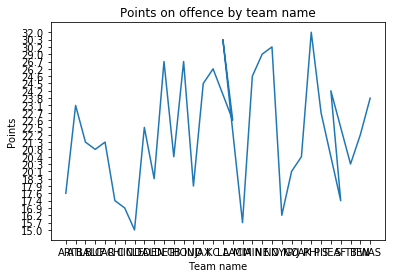

In [185]:
import matplotlib.pylab as plt

plt.plot(df2['team-name'], df2['points'])
plt.xlabel('Team name')
plt.ylabel('Points')
plt.title('Points on offence by team name')

plt.show()

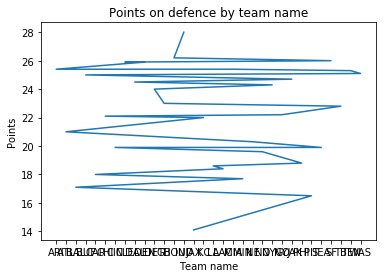

,team-name,points,yards,pass-yards,rush-yards
14,JAX,14.1,275.6,162.0,113.6
26,PIT,16.5,287.6,190.0,97.6
2,BAL,17.1,306.0,185.2,120.8
19,MIN,17.7,290.4,214.9,75.5
4,CAR,18.0,278.0,197.4,80.6
16,LAC,18.4,339.5,206.0,133.5
17,LA,18.6,335.0,211.7,123.3
25,PHI,18.8,306.8,235.8,71.0
21,NO,19.6,326.7,211.3,115.4
6,CIN,19.9,323.0,200.6,122.4


In [201]:
plt.plot(df3['team-name'], df3['points'])
plt.xlabel('Team name')
plt.ylabel('Points')
plt.title('Points on defence by team name')

plt.show()

In [202]:
#This table is useful to see in which period teams are likely to score
#However, it might be interesting to have a table of matchups
df2.sort_values("points").tail()

,team-name,points,yards,pass-yards,rush-yards
10,DET,26.7,333.9,255.6,78.3
20,NE,29.0,410.6,304.6,106.0
21,NO,30.2,415.7,271.7,144.0
17,LA,30.3,375.4,255.0,120.4
25,PHI,32.0,377.6,233.0,144.6


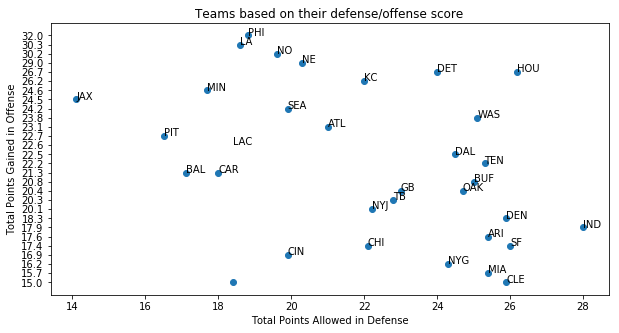

In [238]:
#df3.sort_values("points")
plt.figure(figsize=(10,5))
x_values = df3['points'].values
y_values = df2['points'].values
plt.scatter(x_values, y_values)
plt.title("Teams based on their defense/offense score")
plt.xlabel("Total Points Allowed in Defense")
plt.ylabel("Total Points Gained in Offense")
for i, txt in enumerate(df3['team-name'].values):
    plt.annotate(txt, (df3['points'][i],df2['points'][i]))
plt.show()

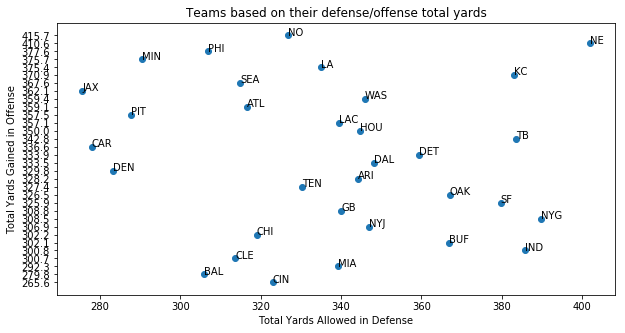

In [233]:
#df3.sort_values("points")
plt.figure(figsize=(10,5))
plt.scatter(df3['yards'].values, df2['yards'].values)
plt.title("Teams based on their defense/offense total yards")
plt.xlabel("Total Yards Allowed in Defense")
plt.ylabel("Total Yards Gained in Offense")
for i, txt in enumerate(df3['team-name'].values):
    plt.annotate(txt, (df3['yards'][i],df2['yards'][i]))
plt.show()

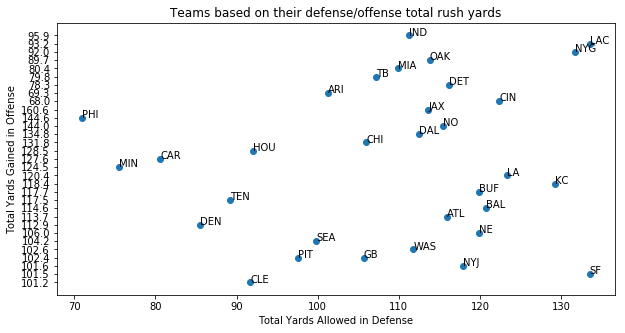

In [234]:
#df3.sort_values("points")
plt.figure(figsize=(10,5))
plt.scatter(df3['rush-yards'].values, df2['rush-yards'].values)
plt.title("Teams based on their defense/offense total rush yards")
plt.xlabel("Total Yards Allowed in Defense")
plt.ylabel("Total Yards Gained in Offense")
for i, txt in enumerate(df3['team-name'].values):
    plt.annotate(txt, (df3['rush-yards'][i],df2['rush-yards'][i]))
plt.show()

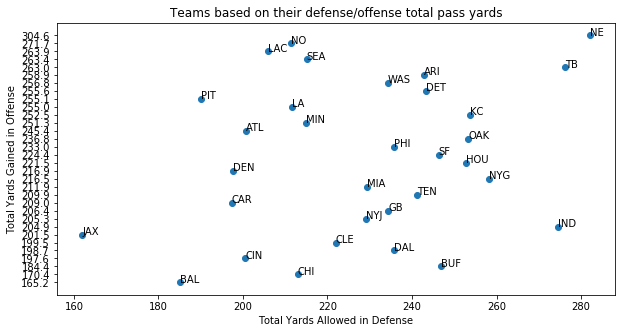

In [235]:
#df3.sort_values("points")
plt.figure(figsize=(10,5))
plt.scatter(df3['pass-yards'].values, df2['pass-yards'].values)
plt.title("Teams based on their defense/offense total pass yards")
plt.xlabel("Total Yards Allowed in Defense")
plt.ylabel("Total Yards Gained in Offense")
for i, txt in enumerate(df3['team-name'].values):
    plt.annotate(txt, (df3['pass-yards'][i],df2['pass-yards'][i]))
plt.show()

In [254]:
df2

,team-name,points,yards,pass-yards,rush-yards
0,ARI,17.6,328.2,258.9,69.3
1,ATL,23.1,359.1,245.4,113.7
2,BAL,21.3,279.8,165.2,114.6
3,BUF,20.8,302.1,184.4,117.7
4,CAR,21.3,336.6,209.0,127.6
5,CHI,17.4,302.2,170.4,131.8
6,CIN,16.9,265.6,197.6,68.0
7,CLE,15.0,300.7,199.5,101.2
8,DAL,22.5,333.5,198.7,134.8
9,DEN,18.3,329.8,216.9,112.9


In [284]:
#Find the distance between two points
#The distance is a good indication on how different two teams are
#Find which team is preferred based on the distances from the four stats
def euclidean_coords(x_val, y_val,team_A, team_B):
    i_A = df2.index[df2['team-name'] == team_A][0]
    i_B = df2.index[df2['team-name'] == team_B][0]
    a = np.array((float(x_val[i_A]),float(y_val[i_A])))
    b = np.array((float(x_val[i_B]),float(y_val[i_B])))
    return a-b
#Used to find euclidean distance
#dist = np.linalg.norm(a-b)

A = "NE"
B = "SEA"
# 'X' has to be minimized and 'Y' has to be maximized for A to be better than B.
points_coords = euclidean_coords(df3["points"], df2["points"],A,B) #Distance for points
yards_coords = euclidean_coords(df3["yards"], df2["yards"],A,B) #Distance for yards
pass_coords = euclidean_coords(df3["pass-yards"], df2["pass-yards"],A,B) #Distance for yards
rush_coords = euclidean_coords(df3["rush-yards"], df2["rush-yards"],A,B) #Distance for yards

print("Points: "+str(points_coords))
print("Yards: "+str(yards_coords))
print("Pass: "+str(pass_coords))
print("Rush: "+str(rush_coords))

Points: [ 0.4  4.8]
Yards: [ 87.  43.]
Pass: [ 66.9  41.2]
Rush: [ 20.1   1.8]


In [281]:
#I have euclidean coordinates between two points for the four stats.
#However, what if a team has more points but less in the other stats? (DEN vs DET)
df2.head()

,team-name,points,yards,pass-yards,rush-yards
0,ARI,17.6,328.2,258.9,69.3
1,ATL,23.1,359.1,245.4,113.7
2,BAL,21.3,279.8,165.2,114.6
3,BUF,20.8,302.1,184.4,117.7
4,CAR,21.3,336.6,209.0,127.6
